# Relax Inc. Take-Home Challenge

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# In order to prepare data to define an 'adopted user', I did the following steps:
* 1) The two dataset 'takehome_users.csv', and 'takehome_user_engagement.csv' were imported as df1, and df2 respectively; 
* 2) the 'time_stamp' column in df2 was converted to datatime format;
* 3) df2 was sorted by 'user_id', and 'time_stamp' for subsequent analyses.

In [2]:
df1 = pd.read_csv('takehome_users.csv',encoding='ISO-8859-1')

In [3]:
df2 = pd.read_csv('takehome_user_engagement.csv')

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
df2.time_stamp = pd.to_datetime(df2.time_stamp)

In [6]:
df2 =df2.sort_values(by=['user_id','time_stamp'])

In [7]:
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


# Define an 'adopted_user' 
* 1) For each user, the sum of visited times on any 7-day window was calculated; if the sum of visited times was equal or greater than 3, then it returns True, else it returns False. 
* 2) Then, I aggregated by each user, the sum of the above values. If there is at least one 'True' value for each user (i.e. a user has logged into the product on 3 separate days in at least one 7-day period), then assign value 1 to the new variable 'adopted_user', else assign value 0. 

In [8]:
df_m = pd.DataFrame(df2.groupby('user_id').rolling(window='7D',on='time_stamp').visited.sum()>=3)

In [9]:
df_m.query('user_id==2').visited

user_id  time_stamp         
2        2013-11-15 03:45:04    False
         2013-11-29 03:45:04    False
         2013-12-09 03:45:04    False
         2013-12-25 03:45:04    False
         2013-12-31 03:45:04    False
         2014-01-08 03:45:04    False
         2014-02-03 03:45:04    False
         2014-02-08 03:45:04    False
         2014-02-09 03:45:04     True
         2014-02-13 03:45:04     True
         2014-02-16 03:45:04    False
         2014-03-09 03:45:04    False
         2014-03-13 03:45:04    False
         2014-03-31 03:45:04    False
Name: visited, dtype: bool

In [10]:
df3 = pd.DataFrame(df_m.groupby('user_id').visited.sum())

In [11]:
df3['adopted_user'] = np.where(df3.visited>0,1,0)

In [12]:
df3.reset_index(inplace=True)
df3 = df3.rename(columns={'index':'user_id'})
df3 = df3.drop('visited',axis=1)

In [13]:
df3.head()

,user_id,adopted_user
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


#### How many users are 'adopted_user'? --- 1602 out of 8823 users

In [14]:
df3.adopted_user.value_counts()

0    7221
1    1602
Name: adopted_user, dtype: int64

In [15]:
len(df1.object_id.unique())

12000

In [16]:
len(df2.user_id.unique())

8823

#### It seems in df1, there were 12000 unique users; however, in df2, there were only 8823. 
#### Therefore, we can assume that the 3177 users that were missing in df2 did not logged into the product, as thus they were not 'adopted_user'

In [17]:
# merge df1 and df3
df = pd.merge(df1,df3,how='left',left_on = 'object_id',right_on='user_id')

In [18]:
df.adopted_user.value_counts()

0.0    7221
1.0    1602
Name: adopted_user, dtype: int64

In [19]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,4.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,5.0,0.0


In [20]:
df.loc[~(df.object_id == df.user_id)]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted_user
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,NaN,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,NaN,NaN
11,12,2014-04-17 23:48:38,Mathiesen Lærke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaN,0,0,130,9270.0,NaN,NaN
14,15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,175,NaN,NaN,NaN
15,16,2013-02-11 10:09:50,Engel René,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,211,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11975,11976,2013-12-25 22:01:41,Kohl Leah,LeahKohl@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,248,NaN,NaN,NaN
11977,11978,2014-04-23 16:28:06,Castro Pedro,PedroCunhaCastro@gustr.com,PERSONAL_PROJECTS,NaN,1,0,29,NaN,NaN,NaN
11984,11985,2013-07-08 17:23:26,Jespersen Marcus,MarcusTJespersen@cuvox.de,PERSONAL_PROJECTS,NaN,0,0,74,NaN,NaN,NaN
11992,11993,2013-03-28 23:24:21,Townsend Isabel,IsabelTownsend@cuvox.de,PERSONAL_PROJECTS,NaN,0,0,281,NaN,NaN,NaN


In [21]:
#fill NAs of 'adopted_user' with 0
df.adopted_user.fillna(0,inplace=True)

In [22]:
df.adopted_user.value_counts()

0.0    10398
1.0     1602
Name: adopted_user, dtype: int64

In [23]:
df.last_session_creation_time.fillna(0,inplace=True)

In [24]:
# create a new feature 'inviated_by_user' and define it as 1 if a user was invited by another user, else 0
df.invited_by_user_id.fillna(0,inplace=True)
df['invited_by_user']=np.where(df.invited_by_user_id>0,1,0)

In [25]:
org = pd.DataFrame(df.org_id.value_counts(normalize=True))

In [26]:
org = org.reset_index().rename({'index':'org_id','org_id':'pct'},axis='columns')

In [27]:
org['org_id_r']=np.where(org['pct']>0.005,org['org_id'],'others')

In [28]:
org

,org_id,pct,org_id_r
0,0,0.026583,0
1,1,0.019417,1
2,2,0.016750,2
3,3,0.014000,3
4,4,0.013250,4
...,...,...,...
412,396,0.000750,others
413,400,0.000667,others
414,397,0.000667,others
415,386,0.000583,others


In [29]:
# merge df, org
dfo = pd.merge(df,org,how='left',left_on = 'org_id',right_on='org_id')

In [30]:
dfo.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted_user,invited_by_user,pct,org_id_r
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,1,0.006250,11
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2.0,1.0,1,0.019417,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3.0,0.0,1,0.002667,others
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,4.0,0.0,1,0.019417,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,5.0,0.0,1,0.001333,others


In [31]:
#define a new dataframe for logistic regression variable importance analyses
dfm = dfo.drop(['user_id','object_id','creation_time','name','email','invited_by_user_id','org_id','pct'],axis=1)

In [32]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   last_session_creation_time  12000 non-null  float64
 2   opted_in_to_mailing_list    12000 non-null  int64  
 3   enabled_for_marketing_drip  12000 non-null  int64  
 4   adopted_user                12000 non-null  float64
 5   invited_by_user             12000 non-null  int64  
 6   org_id_r                    12000 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 750.0+ KB


In [33]:
# identify which factors predict future user adoption

In [34]:
dfm2 = pd.get_dummies(dfm,columns=['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','invited_by_user','org_id_r'],drop_first=True)

X = dfm2.drop(['adopted_user'],axis=1)
y = dfm2.adopted_user
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=52)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
lr_accuracy = round(accuracy_score(y_test,y_pred),3)
print(lr_accuracy)
# output feature importance 
coef = abs(lr.coef_[0])
dat = pd.DataFrame(sorted(zip(coef, X.columns),reverse=True),columns=['Coefficient','Variable'])
dat

0.877


,Coefficient,Variable
0,17.054202,last_session_creation_time
1,0.500717,org_id_r_others
2,0.128066,org_id_r_13
3,0.124920,creation_source_ORG_INVITE
4,0.115003,creation_source_SIGNUP
5,0.112363,org_id_r_7
6,0.102512,org_id_r_9
7,0.101930,org_id_r_4
8,0.097413,org_id_r_5
9,0.090924,org_id_r_24


In [36]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
rf_accuracy = round(accuracy_score(y_test,y_pred),3)
print(rf_accuracy)
# output feature importance 
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf,X_test,y_test)

0.891


Text(0.5, 0, 'Permutation Importance')

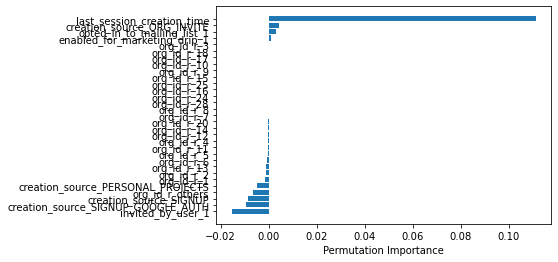

In [37]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx],perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [38]:
dat = pd.DataFrame(zip(X.columns,abs(perm_importance.importances_mean)),columns=['variable','permutation importance']).sort_values(by='permutation importance',ascending=False)
dat.head(5)

,variable,permutation importance
0,last_session_creation_time,0.111333
7,invited_by_user_1,0.015467
4,creation_source_SIGNUP_GOOGLE_AUTH,0.009400
3,creation_source_SIGNUP,0.008600
30,org_id_r_others,0.006400


#### Random forest model performs better than logitic regression, so the results of random forest were used. Based on the permutation importance, some important factors that predict future user adoption include 'last_session_creation_time', and 'invited_by_user'. Those with more recent last login, and those invited by an existing user are more likely to be adopted users.  